# Importing Necessary Packages

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data

In [124]:
df = pd.read_csv(r"C:\Users\SAM_DK1\Downloads\airbnb\listings.csv")

# Exploring the Data

In [125]:
df.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1577,13491924,Rental unit in Amsterdam · ★5.0 · 1 bedroom ·...,56163785,Leonora,NaN,Centrum-West,52.37643,4.88233,Entire home/apt,299,90,16,2021-09-07,0.22,3,172,0,03634E9A2E6918B6BC39


In [126]:
df.shape

(7608, 18)

In [127]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [128]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.608000e+03,7.608000e+03,0.0,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,6898.000000,7608.000000,7608.000000,7608.000000
mean,2.328487e+17,1.032177e+08,NaN,52.366725,4.889936,251.065589,4.914564,47.499211,1.170351,1.798896,79.586619,11.798896
std,3.489604e+17,1.393419e+08,NaN,0.017068,0.035059,263.170218,33.263777,106.402516,2.353310,2.590756,106.483001,33.469905
min,2.818000e+03,3.159000e+03,NaN,52.290340,4.755710,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.696009e+07,9.937172e+06,NaN,52.355890,4.866060,148.000000,2.000000,3.000000,0.270000,1.000000,0.000000,0.000000
50%,3.822749e+07,3.501297e+07,NaN,52.365980,4.887770,202.000000,3.000000,11.000000,0.560000,1.000000,21.000000,3.000000
75%,6.525168e+17,1.402245e+08,NaN,52.376470,4.908300,300.000000,4.000000,40.000000,1.260000,1.000000,145.000000,9.000000
max,9.071470e+17,5.183111e+08,NaN,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000,1626.000000


Now removing these unnecessary columns from data:
   - name : it is just the title of the listing, with no benefit in analysis
   - host_name : if we included the host name, data will be biased toward specific individuals
   - neighbourhood_group : because this data is only in Amesterdam, which is a single neighbourhood.
   - number_of_reviews_ltm : number of reviews in the last 12 months isn't important
   - last_review : the date of the last review isn't important
   - license : the license of the host won't be helpful in analysis

In [132]:
df.drop(['name', 'host_name', 'neighbourhood_group', 'number_of_reviews_ltm', 'last_review', 'license'], axis=1, inplace=True)

In [133]:
df.sample()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
155,995087,4415881,Westerpark,52.381615,4.877059,Private room,89,5,409,3.53,1,11


Handling null values and duplicates

In [134]:
df.isnull().sum()

id                                  0
host_id                             0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 710
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [135]:
# replacing null values with 0, indicating 0 reviews
df.fillna({'reviews_per_month':0}, inplace=True)

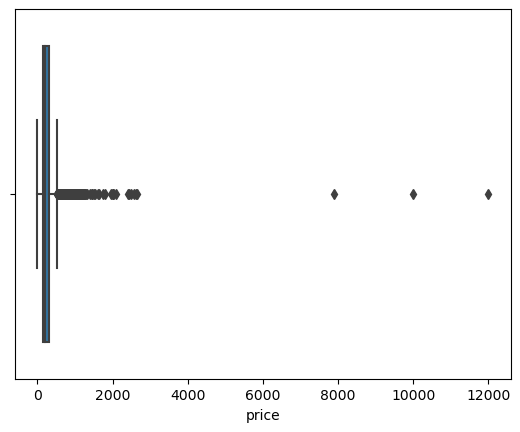

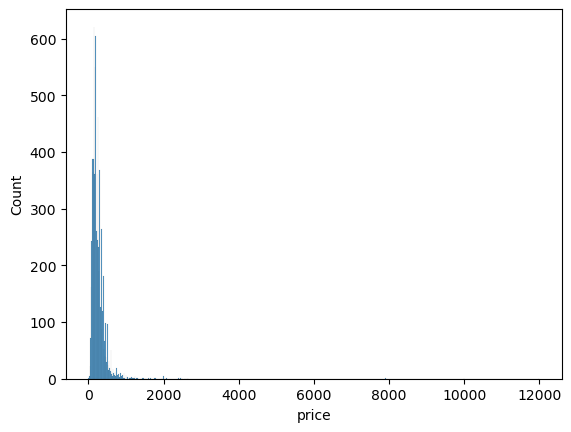

In [152]:
plt.figure()
sns.boxplot(x = df['price'])
plt.show()
plt.figure()
sns.histplot(df['price'])
plt.show()

Prices of rentals is skewed, with many outliers, but most of the data is around 0-1000

<Axes: xlabel='room_type', ylabel='price'>

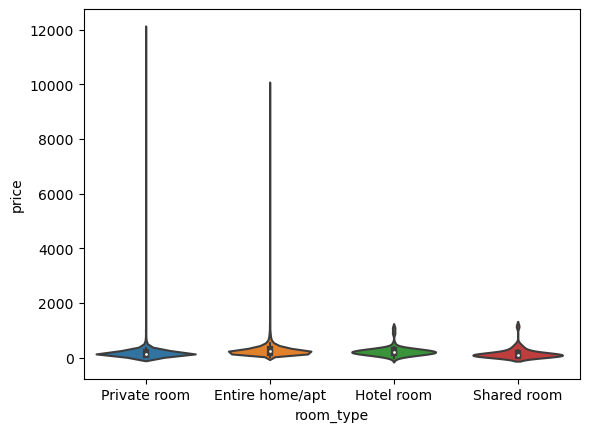

In [154]:
sns.violinplot(data=df, x='room_type', y='price')

<Axes: xlabel='room_type', ylabel='count'>

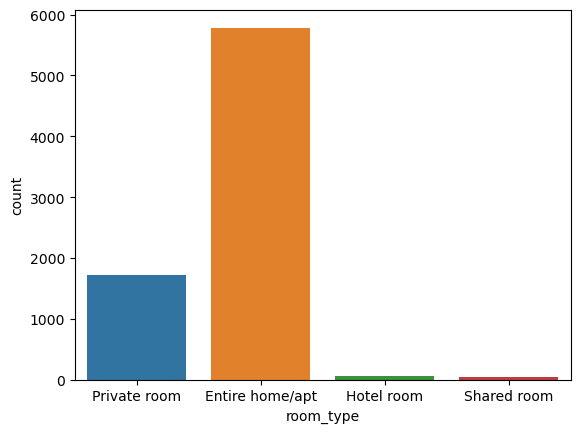

In [166]:
sns.countplot(x = df['room_type'])

with this numerical-categorical boxplot, we can see that hotel and shared rooms are in the same price interval, while price exponentially increases in cases of Entire home or private room rentals. Which suggests that Entire home or private room rentals are more valuable to customers.

And, the countplot shows that most of the data count is Entire home or private rooms which can be so expensive. Which explains why the data were so skewed and also explains the many outliers in both room types

<Axes: xlabel='neighbourhood', ylabel='count'>

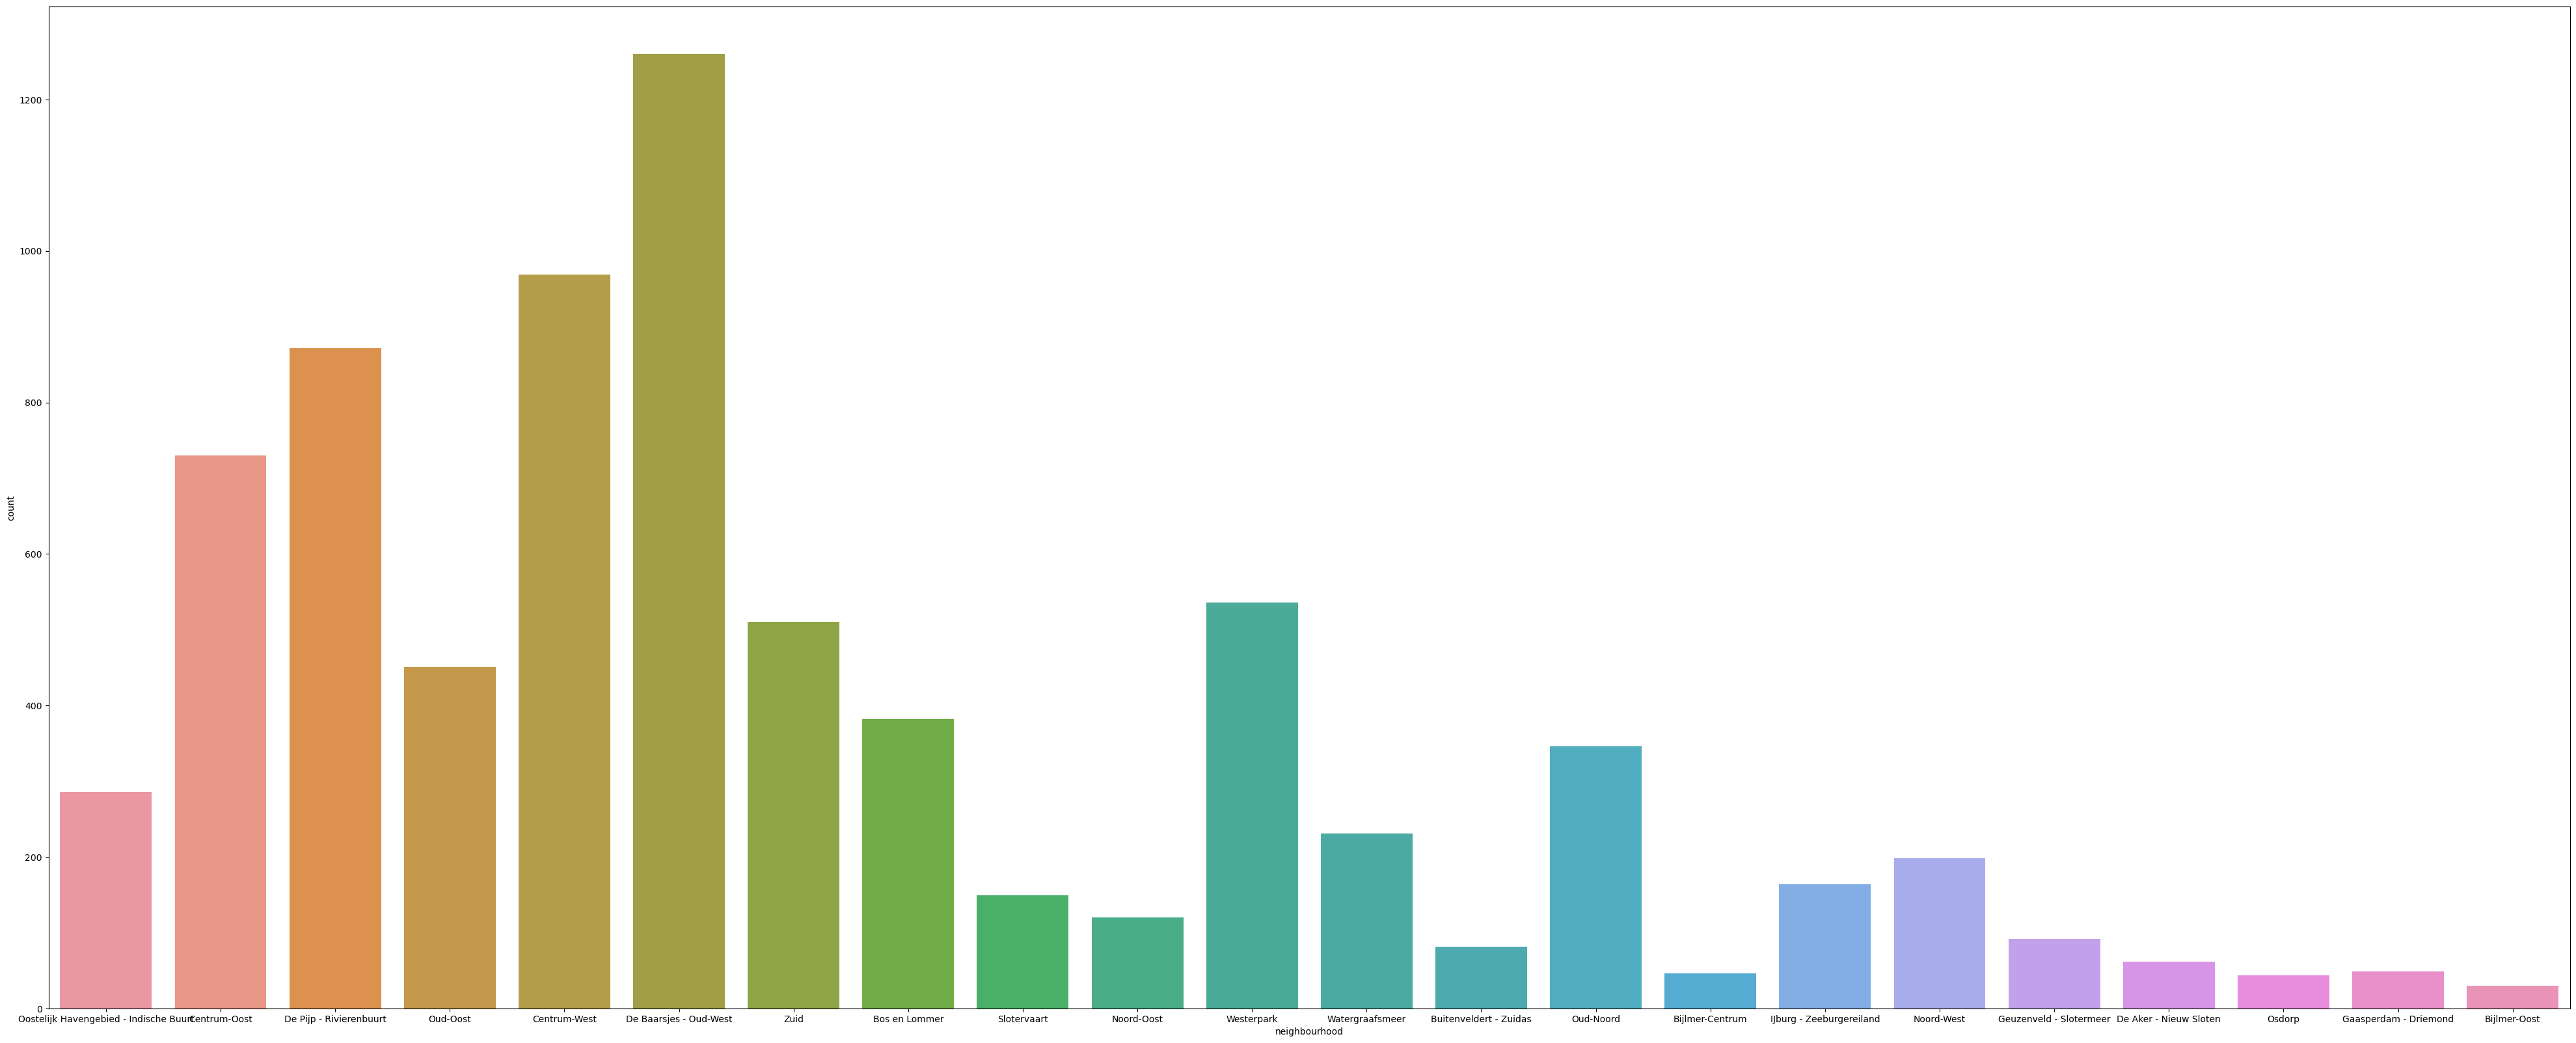

In [226]:
plt.figure(figsize=(50,20))
sns.countplot(x = df['neighbourhood'])

Here we can see that some neighbourhoods have higher listing counts than others

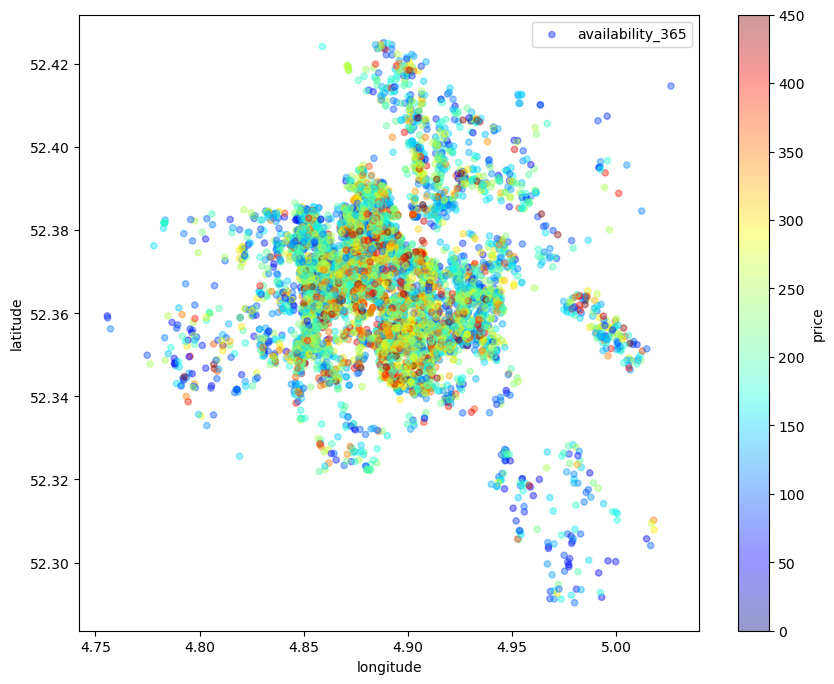

In [225]:
fig = df[df.price < df.price.mean() + 200].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
fig.legend()

By looking at the map of Amesterdam above, we can see that the rentals with prices from 250 to 450 are concentrated in the neighbourhoods in the middle of amesterdam, while lower price rentals exist more on the outerparts of the city